<a href="https://colab.research.google.com/github/amitshahasurja719/new/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('drive/My Drive/Test.xlsx')
data.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
np.set_printoptions(suppress = True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
data.drop("SNo", axis = 1, inplace = True)
data.drop("Country", axis = 1, inplace = True)
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,Abruzzo,42.35,13.40,0,0,0,0,0,0,0,0,0,nan
1,2020-02-24T18:00:00,17,Basilicata,40.64,15.81,0,0,0,0,0,0,0,0,0,nan
2,2020-02-24T18:00:00,21,P.A. Bolzano,46.50,11.36,0,0,0,0,0,0,0,0,0,nan
3,2020-02-24T18:00:00,18,Calabria,38.91,16.59,0,0,0,0,0,0,0,0,0,nan
4,2020-02-24T18:00:00,15,Campania,40.84,14.25,0,0,0,0,0,0,0,0,0,nan


In [ ]:
data.isnull().sum()

Date                            0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [ ]:
data['TestsPerformed'].fillna(0, inplace = True)
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,Abruzzo,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,2020-02-24T18:00:00,17,Basilicata,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-24T18:00:00,21,P.A. Bolzano,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-24T18:00:00,18,Calabria,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-24T18:00:00,15,Campania,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data.isnull().sum()

Date                         0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data['RegionName'] = lbl.fit_transform(data['RegionName'])
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-02-24T18:00:00,13,0,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,2020-02-24T18:00:00,17,1,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,2020-02-24T18:00:00,21,11,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-24T18:00:00,18,2,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-24T18:00:00,15,3,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.datetime.toordinal)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,737479,13,0,42.35,13.40,0,0,0,0,0,0,0,0,0,0.00
1,737479,17,1,40.64,15.81,0,0,0,0,0,0,0,0,0,0.00
2,737479,21,11,46.50,11.36,0,0,0,0,0,0,0,0,0,0.00
3,737479,18,2,38.91,16.59,0,0,0,0,0,0,0,0,0,0.00
4,737479,15,3,40.84,14.25,0,0,0,0,0,0,0,0,0,0.00


In [ ]:
data = data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
data.head()

,Date,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0.00,0.57,0.00,0.51,0.64,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
1,0.00,0.76,0.05,0.30,0.89,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
2,0.00,0.95,0.55,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
3,0.00,0.81,0.10,0.09,0.97,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
4,0.00,0.67,0.15,0.32,0.73,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00


In [ ]:
data.columns

Index(['Date', 'RegionCode', 'RegionName', 'Latitude', 'Longitude',
       'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

In [ ]:
X = data[['Date', 'RegionCode', 'RegionName', 'Latitude', 'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement', 
          'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths', 'TestsPerformed']]
Y = data['TotalPositiveCases']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bf = SelectKBest(score_func = f_regression, k = 12)
fit = bf.fit(X,Y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([datacolumns, datascores], axis = 1)
featureScores.columns = ['Specs', 'Score']
featureScores

,Specs,Score
0,Date,183.28
1,RegionCode,614.84
2,RegionName,1.78
3,Latitude,268.34
4,Longitude,322.32
5,HospitalizedPatients,1757.62
6,IntensiveCarePatients,779.19
7,TotalHospitalizedPatients,1645.21
8,HomeConfinement,8822.00
9,CurrentPositiveCases,6392.34


In [ ]:
print(featureScores.nlargest(8, 'Score'))

                        Specs     Score
12                     Deaths 109297.83
11                  Recovered  19563.41
8             HomeConfinement   8822.00
9        CurrentPositiveCases   6392.34
13             TestsPerformed   3188.71
5        HospitalizedPatients   1757.62
7   TotalHospitalizedPatients   1645.21
6       IntensiveCarePatients    779.19


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


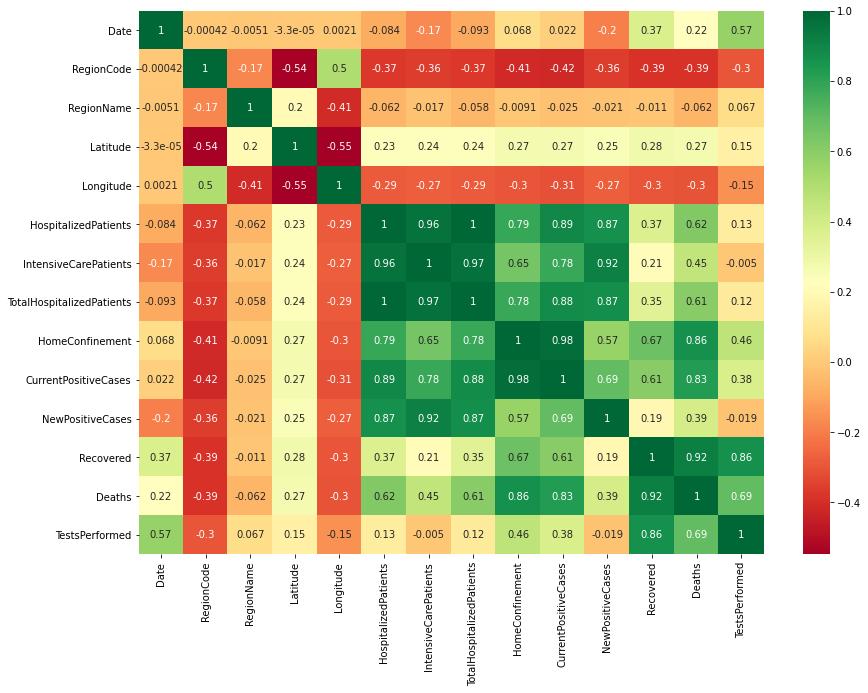

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_feat = set()
corr_mat = X.corr()
top_corr_features = corr_mat.index
plt.figure(figsize = (14,10))
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [ ]:
X = data[['HomeConfinement', 'Deaths', 'CurrentPositiveCases', 'Recovered', 'TestsPerformed']]
Y = data['TotalPositiveCases']

In [ ]:
x = X.values
y = Y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
model = keras.models.Sequential()
 
model.add(keras.layers.Dense(8, activation='relu', input_shape=(5,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))
 
model.compile(optimizer= 'Adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, epochs=100, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
56/56 [==============================] - 0s 939us/step - loss: 4.3936e-07
Epoch 2/100
56/56 [==============================] - 0s 1ms/step - loss: 6.5167e-07
Epoch 3/100
56/56 [==============================] - 0s 1ms/step - loss: 6.7499e-07
Epoch 4/100
56/56 [==============================] - 0s 1ms/step - loss: 6.3032e-07
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 4.9877e-07
Epoch 6/100
56/56 [==============================] - 0s 948us/step - loss: 4.0780e-07
Epoch 7/100
56/56 [==============================] - 0s 1ms/step - loss: 4.3922e-07
Epoch 8/100
56/56 [==============================] - 0s 1ms/step - loss: 7.9506e-07
Epoch 9/100
56/56 [==============================] - 0s 1ms/step - loss: 5.6332e-07
Epoch 10/100
56/56 [==============================] - 0s 1ms/step - loss: 1.1998e-06
Epoch 11/100
56/56 [==============================] - 0s 1ms/step - loss: 5.4460e-07
Epoch 12/100
56/56 [==============================] - 0s 939us/step - 

In [ ]:
from sklearn import metrics
pred = model.predict(x_test)  
MSE = metrics.mean_squared_error(pred, y_test)
print("Final score (MSE): {:.10f}".format(MSE))

Final score (MSE): 0.0000001890


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {:.10f}".format(RMSE))

Final score (RMSE): 0.0004347602


In [ ]:
MAE = metrics.mean_absolute_error(pred, y_test)
print("Final score (MAE): {:.10f}".format(MAE))

Final score (MAE): 0.0003731635


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

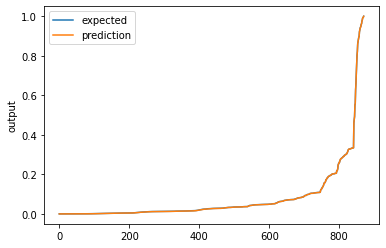

In [ ]:
chart_regression(pred.flatten(),y_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred, multioutput='variance_weighted')

0.9999926224009906

In [ ]:
predict = pd.read_excel('drive/My Drive/Predict.xlsx')
predict.tail()

,HomeConfinement,CurrentPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
2,301,323,8817,1103,10243,227034
3,52,54,4404,405,4863,62021
4,6,9,1351,80,1440,64456
5,1,4,1044,146,1194,13681
6,443,460,16807,2008,19275,405126


In [ ]:
predict = predict.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
predict.tail()

,HomeConfinement,CurrentPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
2,0.68,0.70,0.49,0.53,0.50,0.55
3,0.12,0.11,0.21,0.17,0.20,0.12
4,0.01,0.01,0.02,0.00,0.01,0.13
5,0.00,0.00,0.00,0.03,0.00,0.00
6,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
test_data = np.array([0.01, 0.00,   0.01,   0.02,   0.13])
print(model.predict(test_data.reshape(1,5), batch_size=1))

[[0.01778849]]
